<a href="https://colab.research.google.com/github/Gourdji19/MyConvolutionAutoencoder/blob/dev/CNNtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
def create_deep_conv_ae():
    input_img = Input(shape=(28, 28, 1))

    x = Conv2D(128, (7, 7), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(1, (7, 7), activation='relu', padding='same')(x)

    # На этом моменте представление  (7, 7, 1) т.е. 49-размерное

    input_encoded = Input(shape=(7, 7, 1))
    x = Conv2D(32, (7, 7), activation='relu', padding='same')(input_encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x)

    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [3]:
c_encoder, c_decoder, c_autoencoder = create_deep_conv_ae()
c_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

c_autoencoder.summary()








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 7, 7, 1)           24385     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         24385     
Total params: 48,770
Trainable params: 48,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
c_autoencoder.fit(x_train, x_train,
                 epochs=10,
                 batch_size=256,
                 shuffle=True,
                 validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 13s 222us/step - loss: 0.1769 - val_loss: 0.1001
Epoch 2/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0944 - val_loss: 0.0884
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0869 - val_loss: 0.0834
Epoch 4/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0836 - val_loss: 0.0807
Epoch 5/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0814 - val_loss: 0.0797
Epoch 6/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0798 - val_loss: 0.0781
Epoch 7/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0786 - val_loss: 0.0767
Epoch 8/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0778 - val_loss: 0.0761
Epoch 9/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0771 - val_

In [0]:
def plot_digits(*args):
 args = [x.squeeze() for x in args]
 n = min([x.shape[0] for x in args])

 plt.figure(figsize=(2 * n, 2 * len(args)))
 for j in range(n):
  for i in range(len(args)):
   ax = plt.subplot(len(args), n, i * n + j + 1)
   plt.imshow(args[i][j])
   plt.gray()
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)

 plt.show()

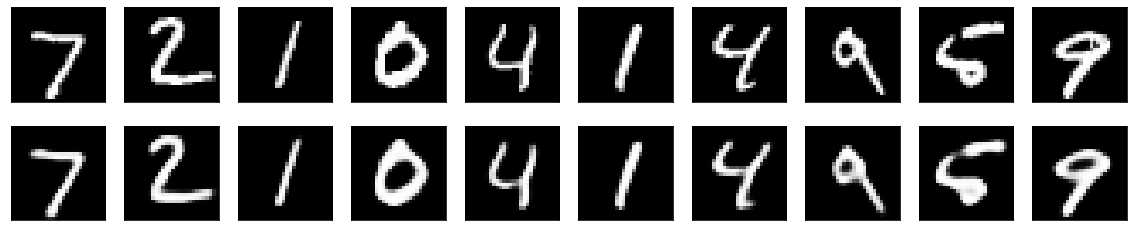

In [6]:
n = 10

imgs = x_test[:n]
encoded_imgs = c_encoder.predict(imgs, batch_size=n)
decoded_imgs = c_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)